In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 5)
plt.style.use("fivethirtyeight")

In [2]:
# lets read the dataset.
Hotel_data = pd.read_csv("E:\Internship - Data Is Good\Task 3\Hospitality minds dataset_Task3.csv")

Hotel_data.shape

(90000, 29)

In [3]:
# lets check the head of the dataset
Hotel_data.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Assigned Room,Booking Changes,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,...,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,...,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,...,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,...,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,...,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [4]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [5]:
# lets check the missing values in the dataset
Hotel_data.isnull().sum().sort_values(ascending = False)

Country                371
Children                 2
Type of Hotel            0
Prev Cancel              0
Cancellation             0
Reservation Status       0
Physical Challenged      0
Parking at premises      0
Per Day Charges          0
Customer                 0
Waiting List             0
Booking Changes          0
Assigned Room            0
Reserved Room            0
History                  0
Booking Type             0
Repeated Guest           0
Year                     0
Kids                     0
Adults                   0
Booking Payment          0
Meal                     0
Weekday Stays            0
Weekend Stays            0
Arrival Date             0
Arrival week             0
Reservation Date         0
Month                    0
Booking Done             0
dtype: int64

In [6]:
Hotel_data["Country"].fillna("XYZ", inplace=True)
Hotel_data["Children"].fillna(0 , inplace=True)

In [7]:
# Checking if all null values are removed

Hotel_data.isnull().sum().sort_values(ascending = False)

Type of Hotel          0
Repeated Guest         0
Cancellation           0
Reservation Status     0
Physical Challenged    0
Parking at premises    0
Per Day Charges        0
Customer               0
Waiting List           0
Booking Changes        0
Assigned Room          0
Reserved Room          0
History                0
Prev Cancel            0
Booking Type           0
Year                   0
Country                0
Kids                   0
Children               0
Adults                 0
Booking Payment        0
Meal                   0
Weekday Stays          0
Weekend Stays          0
Arrival Date           0
Arrival week           0
Reservation Date       0
Month                  0
Booking Done           0
dtype: int64

In [8]:
Hotel_data["Children"] = Hotel_data["Children"].astype("int64")

Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             90000 non-null  int64  
 12  Kids                 90000 non-null  int64  
 13  Country              90000 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [9]:
# lets check the descriptive summary
Hotel_data.describe().style.background_gradient(cmap = "Greens")

,Year,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Adults,Children,Kids,Repeated Guest,Prev Cancel,History,Booking Changes,Waiting List,Per Day Charges,Parking at premises,Physical Challenged,Cancellation,Booking Done
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,2016.168711,27.122456,16.408356,0.908433,2.526967,1.857967,0.104511,0.009667,0.031300,0.058300,0.138289,0.228178,1.306944,101.745815,0.063956,0.623367,0.373722,107.271256
std,0.708918,13.589391,9.083017,1.002316,1.851936,0.525628,0.399710,0.099309,0.174128,0.430933,1.456766,0.658184,13.365843,47.853487,0.245265,0.817632,0.483794,111.192091
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,19.000000
50%,2016.000000,27.000000,17.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000
75%,2017.000000,38.000000,25.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000,163.000000
max,2017.000000,53.000000,31.000000,14.000000,35.000000,26.000000,3.000000,2.000000,1.000000,26.000000,66.000000,16.000000,391.000000,437.000000,2.000000,5.000000,1.000000,629.000000


In [10]:
# Adding Coloumns

Hotel_data["Total_Guests"] = Hotel_data["Adults"] + Hotel_data["Children"]

Hotel_data["Total_stay"] = Hotel_data["Weekend Stays"] + Hotel_data["Weekday Stays"]

Hotel_data.head()

,Type of Hotel,Year,Month,Reservation Date,Arrival week,Arrival Date,Weekend Stays,Weekday Stays,Meal,Booking Payment,...,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done,Total_Guests,Total_stay
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,...,0,Contract,132.0,0,2,Check-Out,0,44,2,5
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,...,0,Transient,150.0,1,1,Check-Out,0,27,2,5
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,...,0,Transient-Party,44.0,0,1,Check-Out,0,180,1,2
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,...,0,Transient,151.0,0,4,Check-Out,0,59,3,2
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,...,0,Transient-Party,115.0,0,1,Check-Out,0,313,2,2


**Data Visualization**

In [11]:
sns.set_style('darkgrid')

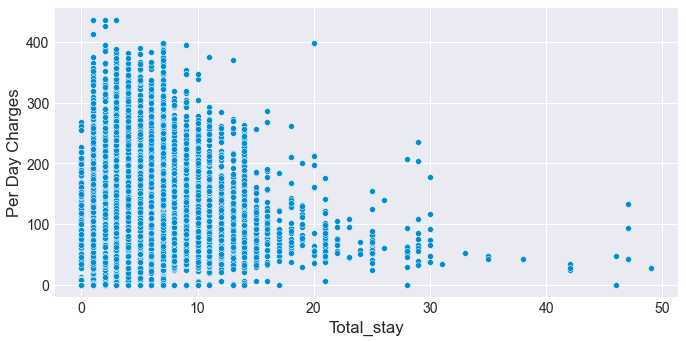

In [12]:
# Per Day Charges and Total_stay

sns.scatterplot(y = "Per Day Charges", x = "Total_stay", data = Hotel_data)
plt.show()

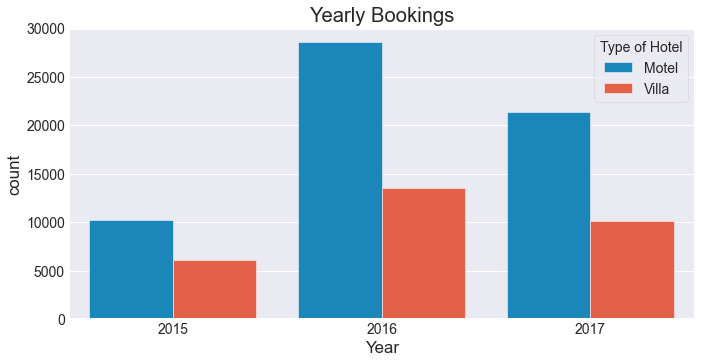

In [13]:
# Hotel wise yearly bookings

sns.countplot(x= "Year", data= Hotel_data, hue= "Type of Hotel").set_title ("Yearly Bookings")

plt.show()

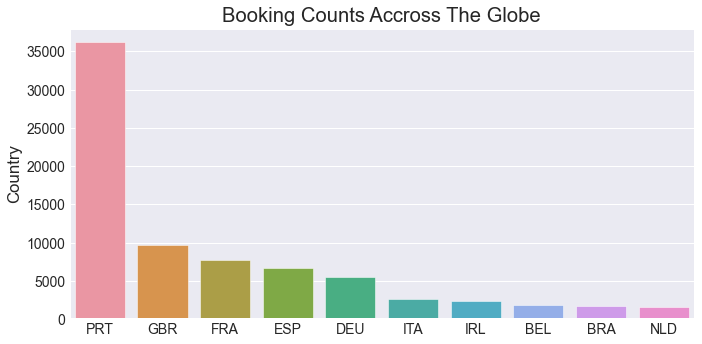

In [14]:
# From where the most guests are coming?

sns.barplot (x = (Hotel_data.Country.value_counts().head(10).index), y = (Hotel_data.Country.value_counts().head (10)))
plt.title("Booking Counts Accross The Globe")
plt.show()

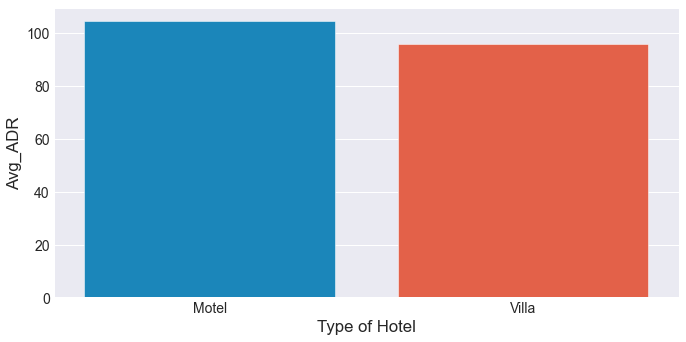

In [15]:
# Which hotel seems to make more revenue?

grouped_by_hotel = Hotel_data.groupby("Type of Hotel")

df = grouped_by_hotel["Per Day Charges"].agg(np.mean).reset_index().rename(columns = {"Per Day Charges":"Avg_ADR"})

sns.barplot(x = df["Type of Hotel"], y = df["Avg_ADR"])

plt.show()

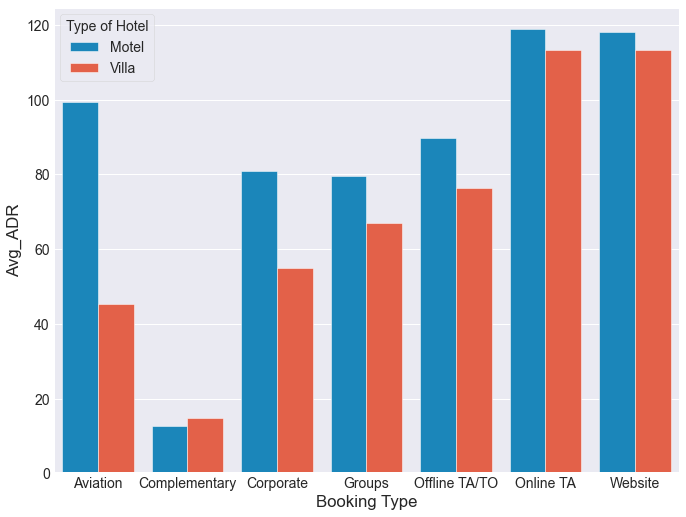

In [16]:
# Which distribution channel provide better revenue generating deals for hotels?

group_by_dc_hotel = Hotel_data.groupby(["Booking Type", "Type of Hotel"])

d11 = pd.DataFrame(round((group_by_dc_hotel["Per Day Charges"]).agg(np.mean),2)).reset_index().rename(columns = {"Per Day Charges": "Avg_ADR"})

plt.figure(figsize = (10,8))

sns.barplot(x = d11["Booking Type"], y = d11["Avg_ADR"], hue = d11["Type of Hotel"])

plt.show()

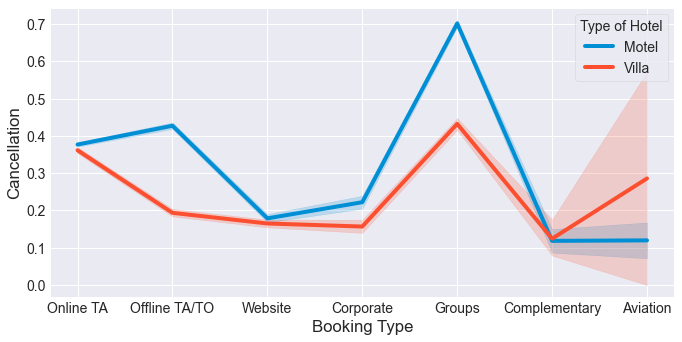

In [17]:
sns.lineplot(y = "Cancellation", x = "Booking Type", data = Hotel_data, hue = "Type of Hotel" )
plt.show()

In [18]:
df1 = Hotel_data.drop(["Adults", "Children", "Month", "Kids", "Country", "Weekend Stays", "Weekday Stays", "Reservation Date",
                      'Reserved Room', 'Assigned Room'], axis=1)

df1.head()

,Type of Hotel,Year,Arrival week,Arrival Date,Meal,Booking Payment,Booking Type,Repeated Guest,Prev Cancel,History,...,Waiting List,Customer,Per Day Charges,Parking at premises,Physical Challenged,Reservation Status,Cancellation,Booking Done,Total_Guests,Total_stay
0,Motel,2015,31,28,Bed & Breakfast,No Deposit,Online TA,0,0,0,...,0,Contract,132.0,0,2,Check-Out,0,44,2,5
1,Villa,2016,35,25,Bed & Breakfast,No Deposit,Online TA,0,0,0,...,0,Transient,150.0,1,1,Check-Out,0,27,2,5
2,Villa,2017,16,21,Bed & Breakfast,No Deposit,Online TA,0,0,0,...,0,Transient-Party,44.0,0,1,Check-Out,0,180,1,2
3,Motel,2016,27,27,Bed & Breakfast,No Deposit,Online TA,0,0,0,...,0,Transient,151.0,0,4,Check-Out,0,59,3,2
4,Motel,2016,34,20,Breakfast & Dinner,No Deposit,Offline TA/TO,0,0,0,...,0,Transient-Party,115.0,0,1,Check-Out,0,313,2,2


In [19]:
df_new = Hotel_data.copy()[["Parking at premises","Booking Done", "Booking Changes", "Per Day Charges", "Total_Guests", 
                            "Prev Cancel", "History", "Waiting List", "Cancellation" ]]
df_new.head()

,Parking at premises,Booking Done,Booking Changes,Per Day Charges,Total_Guests,Prev Cancel,History,Waiting List,Cancellation
0,0,44,0,132.0,2,0,0,0,0
1,1,27,1,150.0,2,0,0,0,0
2,0,180,0,44.0,1,0,0,0,0
3,0,59,0,151.0,3,0,0,0,0
4,0,313,0,115.0,2,0,0,0,0


In [20]:
# lets form dependent and independent sets

x = df_new.drop(["Cancellation"], axis = 1) 
y = df_new["Cancellation"] 

print(y.shape)
print(x.columns)

(90000,)
Index(['Parking at premises', 'Booking Done', 'Booking Changes',
       'Per Day Charges', 'Total_Guests', 'Prev Cancel', 'History',
       'Waiting List'],
      dtype='object')


In [21]:
# Separate dataset into train and test.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 46)

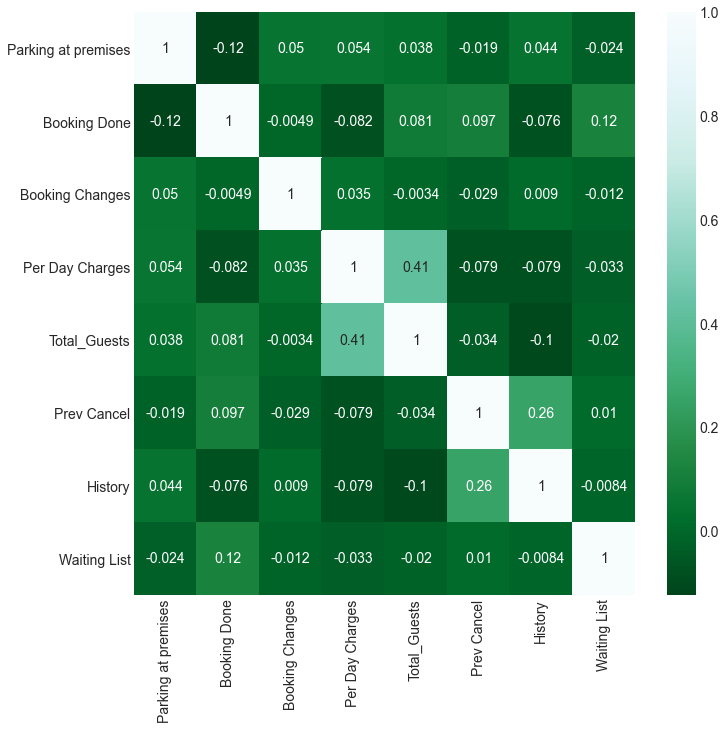

In [22]:
# Using pearson correlation.

plt.figure(figsize = (10,10))
corr = x_train.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.BuGn_r)
plt.show()

In [23]:
# With the following function we can select highly correlated features
# It will reomve the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [24]:
corr_features = correlation(x_train, 0.5)
len(set(corr_features))

0

In [25]:
# perform standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**1. Implementing Logistic Regression**

In [26]:
# Importing logistic regression.

from sklearn.linear_model import LogisticRegression

In [27]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

predict_model1 = model1.predict(x_test)

In [28]:
# lets check the Model accuracy

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, predict_model1)

rmse = np.sqrt(mse)

r2_score = r2_score(y_test, predict_model1)

print("RMSE Score :", rmse*100)

print("R2 Score :",r2_score*100)

RMSE Score : 54.883715455699814
R2 Score : -29.081039180928215


In [29]:
model1.score(x_test, y_test)*100

69.87777777777778

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, predict_model1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79     11322
           1       0.67      0.37      0.48      6678

    accuracy                           0.70     18000
   macro avg       0.69      0.63      0.63     18000
weighted avg       0.69      0.70      0.67     18000



In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predict_model1)

array([[10109,  1213],
       [ 4209,  2469]], dtype=int64)

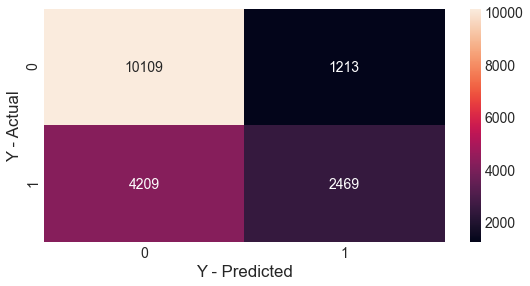

In [33]:
plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, predict_model1), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

**2. Implementing Randomforest Classifier**

In [34]:
# Importing RandomForest Classifier.

from sklearn.ensemble import RandomForestClassifier

In [35]:
classifier_model2 = RandomForestClassifier(n_estimators=100, max_depth=10 , random_state  = 5)
classifier_model2.fit(x_train , y_train)

predict_model2 = classifier_model2.predict(x_test)

In [36]:
classifier_model2.score(x_test, y_test)*100

70.77222222222223

In [37]:
print(classification_report(y_test, predict_model2))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80     11322
           1       0.77      0.30      0.43      6678

    accuracy                           0.71     18000
   macro avg       0.74      0.62      0.62     18000
weighted avg       0.73      0.71      0.67     18000



In [38]:
confusion_matrix(y_test, predict_model2)

array([[10735,   587],
       [ 4674,  2004]], dtype=int64)

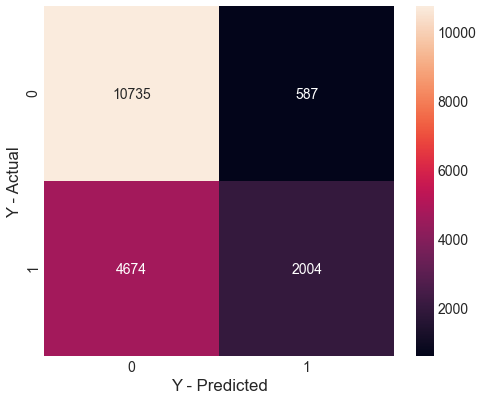

In [39]:
plt.subplots(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predict_model2), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

**3. Implementing Naive Bayes Classifier Algorithm**

In [40]:
# Importing Naive Bayes.

from sklearn.naive_bayes import GaussianNB

In [41]:
classifier_model3 = GaussianNB()
classifier_model3.fit(x_train , y_train)

predict_model3 = classifier_model3.predict(x_test)

In [42]:
classifier_model3.score(x_test, y_test)*100

44.605555555555554

In [43]:
print(classification_report(y_test, predict_model3))

              precision    recall  f1-score   support

           0       0.98      0.12      0.22     11322
           1       0.40      0.99      0.57      6678

    accuracy                           0.45     18000
   macro avg       0.69      0.56      0.39     18000
weighted avg       0.76      0.45      0.35     18000



In [44]:
confusion_matrix(y_test, predict_model3)

array([[1385, 9937],
       [  34, 6644]], dtype=int64)

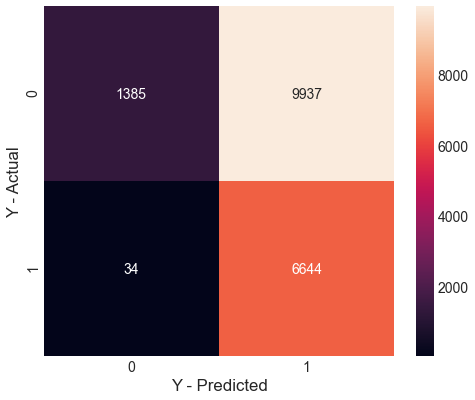

In [45]:
plt.subplots(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predict_model3), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

**4. Implemtation K Nearest Neighbor Classification Algorithm**

In [46]:
# Importing K Nearest Neighbor.

from sklearn.neighbors import KNeighborsClassifier

In [47]:
classifier_model4 = KNeighborsClassifier(n_neighbors=5)
classifier_model4.fit(x_train, y_train)

predict_model4 = classifier_model4.predict(x_test)

In [48]:
classifier_model4.score(x_test, y_test)*100

68.84444444444443

In [49]:
print(classification_report(y_test, predict_model4))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     11322
           1       0.59      0.52      0.56      6678

    accuracy                           0.69     18000
   macro avg       0.66      0.65      0.66     18000
weighted avg       0.68      0.69      0.68     18000



In [50]:
confusion_matrix(y_test, predict_model4)

array([[8887, 2435],
       [3173, 3505]], dtype=int64)

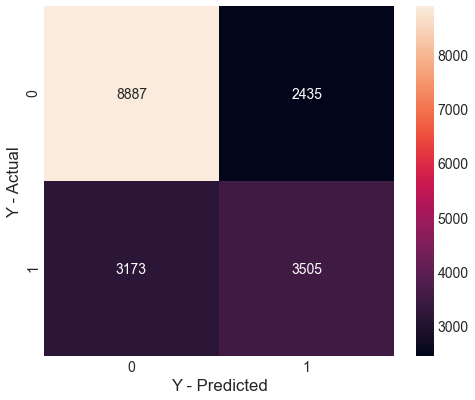

In [51]:
plt.figure(figsize = (7,6))
sns.heatmap(confusion_matrix(y_test, predict_model4), annot=True, fmt='.0f')
plt.xlabel('Y - Predicted')
plt.ylabel('Y - Actual')
plt.show()

In [52]:
from sklearn.svm import SVC

In [ ]:
classifier_model7 = SVC(kernel = "linear")

classifier_model7.fit(x_train, y_train)

predict_model7 = classifier_model7.predict(x_test)